<a href="https://colab.research.google.com/github/jiyoungemma/User-Log-data-analytics/blob/main/ecommerce_user_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터셋 설명

- event_time : time when event happend at
- event_type : only one kind of event
   - view : a user viewed a product
   - cart : a user added a product to shopping cart
   - remove_from_cart : a user removed a product from shopping cart
   - purchase : a user purchased a product
- product_id : ID of a product
- catagory_id : product's category ID
- category_code : Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories
- brand : downcased string of brand name. can be missed
- price
- user_id : permanent user ID
- user_session : 	Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause

- Multiple purchases per session
   - A session can have multiple purchase events
   - it's ok b/c it's a single order

### 라이브러리

In [3]:
pip install squarify

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import squarify # 트리맵 라이브러리
from datetime import datetime
%matplotlib inline
import pandas as pd
import datetime

### 데이터셋 불러오기

In [3]:
df = pd.read_csv('/content/drive/MyDrive/2019-Oct.csv')

In [ ]:
df.shape

(42448764, 9)

In [ ]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [4]:
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_convert(None)

In [ ]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [5]:
# 가격이 0인 경우 drop
zero_price = df.loc[df['price'] == 0].index
df.drop(zero_price, inplace=True)

In [ ]:
df['price'].describe()

count    4.238009e+07
mean     2.907941e+02
std      3.583685e+02
min      7.700000e-01
25%      6.666000e+01
50%      1.639700e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64

In [ ]:
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13478561
brand             6048407
price                   0
user_id                 0
user_session            2
week                    0
date                    0
hour                    0
dtype: int64

In [6]:
# 세션이 없는 경우는 접속 시도가 없는 경우로 인지하고 drop
df = df.dropna(subset=['user_session'])

In [7]:
# 카테고리 코드와 브랜드 모두 결측치인 경우 drop
non_category_brand = df[(df['brand'].isnull()) & (df['category_code'].isnull())].index
df.drop(non_category_brand, inplace=True)

In [ ]:
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    9771062
brand            2340908
price                  0
user_id                0
user_session           0
week                   0
date                   0
hour                   0
dtype: int64

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


### 브랜드

In [8]:
purchase = df.loc[df['event_type'] == 'purchase']
purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [9]:
purchase = purchase.reset_index(drop=True)
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
3,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
704456,2019-10-31 23:53:53,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
704457,2019-10-31 23:55:21,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
704458,2019-10-31 23:56:03,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
704459,2019-10-31 23:56:53,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


In [ ]:
purchase.shape

(704461, 9)

In [15]:
buy_brand = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
buy_brand.head(10)

,count
brand,
samsung,172896
apple,142873
xiaomi,56616
huawei,23501
lucente,11578
oppo,10891
cordiant,10551
lg,8727
acer,6882


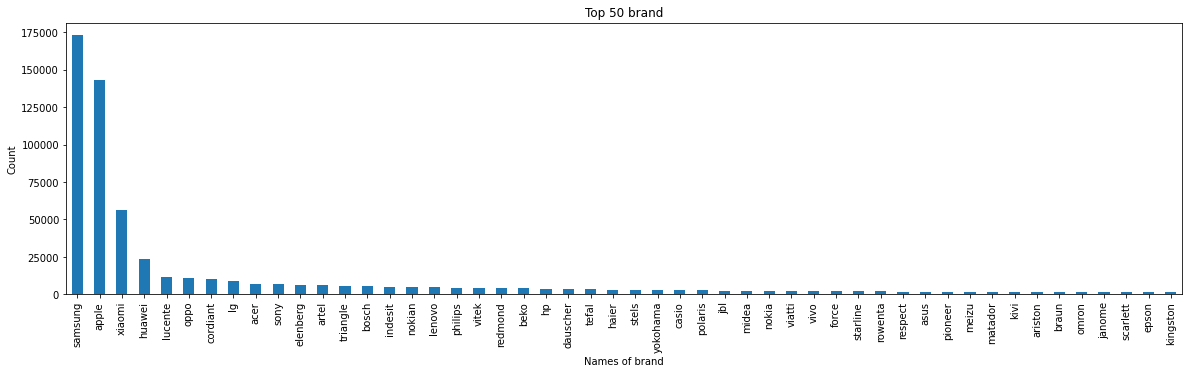

In [16]:
purchase['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Top 50 brand')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

In [8]:
view = df.loc[df['event_type'] == 'view']

In [9]:
view = view.reset_index(drop=True)
view

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
37049137,2019-10-31 23:59:58,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
37049138,2019-10-31 23:59:58,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
37049139,2019-10-31 23:59:58,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
37049140,2019-10-31 23:59:59,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [17]:
view_brand = view.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
view_brand.head(10)

,count
brand,
samsung,4806630
apple,3770597
xiaomi,2922650
huawei,1045572
lucente,644283
bosch,544230
lg,540131
oppo,451449
sony,439855


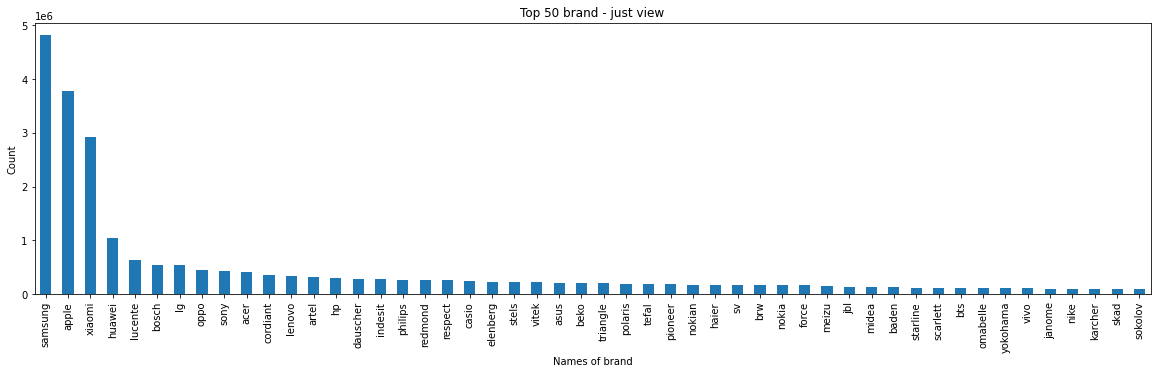

In [18]:
view['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Top 50 brand - just view')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

### 카테고리 별

In [ ]:
purchase['category_code'].value_counts()

electronics.smartphone          338018
electronics.audio.headphone      30503
electronics.video.tv             21565
electronics.clocks               17906
appliances.kitchen.washer        16148
                                 ...  
apparel.skirt                        4
apparel.shorts                       2
apparel.jumper                       2
apparel.jacket                       1
construction.tools.soldering         1
Name: category_code, Length: 121, dtype: int64

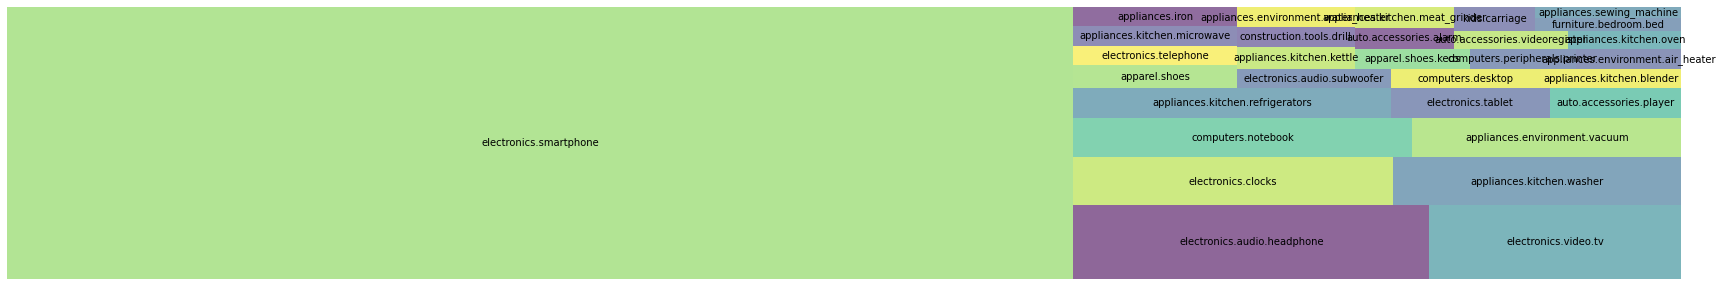

In [ ]:
top_30 = purchase.loc[:,'category_code'].value_counts()[:30].sort_values(ascending=False)
plt.figure(figsize=(30,5))
squarify.plot(top_30, label=top_30.index.array, alpha=0.6)
plt.axis('off')
plt.show();

- 카테고리 코드의 맨 첫번째가 종류, 마지막이 제품
- 나눠서 열 만들수 없을까?

### 카테고리 feature engineering

In [33]:
purchase['main_category'] = purchase.category_code.str.split('.').str[0]
purchase['subcategory'] = purchase.category_code.str.split('.').str[-1]
purchase = purchase.reset_index(drop=True)

In [20]:
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
2,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,NaN,NaN
3,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,toilet
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,headphone
...,...,...,...,...,...,...,...,...,...,...,...
704456,2019-10-31 23:53:53,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone
704457,2019-10-31 23:55:21,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,light
704458,2019-10-31 23:56:03,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone
704459,2019-10-31 23:56:53,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,electronics,smartphone


In [10]:
view['main_category'] = view.category_code.str.split('.').str[0]
view['subcategory'] = view.category_code.str.split('.').str[-1]
view = view.reset_index(drop=True)

In [11]:
view

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,NaN,NaN
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,water_heater
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,sofa
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone
...,...,...,...,...,...,...,...,...,...,...,...
37049137,2019-10-31 23:59:58,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,video
37049138,2019-10-31 23:59:58,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,NaN,NaN
37049139,2019-10-31 23:59:58,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd,auto,player
37049140,2019-10-31 23:59:59,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,electronics,clocks


In [ ]:
purchase['main_category'].value_counts()

electronics     423028
appliances       74996
computers        27855
auto             10620
furniture         8301
apparel           8002
construction      7801
kids              5482
accessories       1587
sport             1236
medicine           310
stationery         134
country_yard        72
Name: main_category, dtype: int64

In [ ]:
purchase['subcategory'].value_counts()

smartphone    338018
headphone      30503
tv             21565
clocks         17906
washer         16148
               ...  
skirt              4
shorts             2
jumper             2
jacket             1
soldering          1
Name: subcategory, Length: 119, dtype: int64

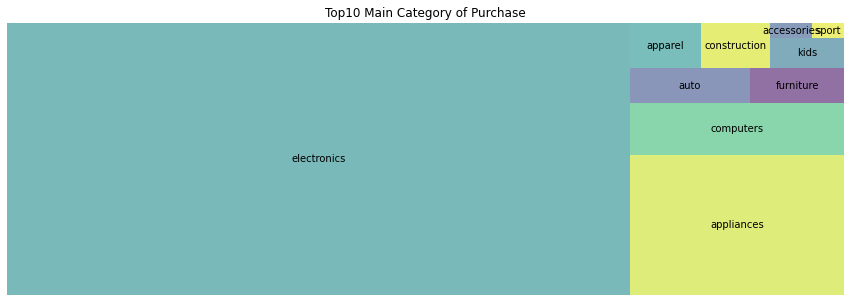

In [ ]:
top_10_main = purchase.loc[:,'main_category'].value_counts()[:10].sort_values(ascending=False)
plt.figure(figsize=(15,5))
squarify.plot(top_10_main, label=top_10_main.index.array, alpha=0.6)
plt.axis('off')
plt.title('Top10 Main Category of Purchase')
plt.show();

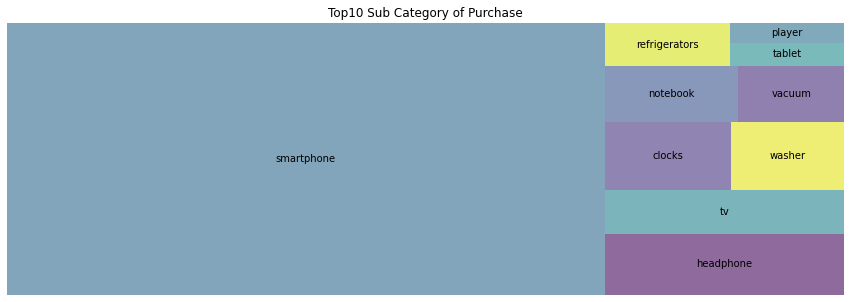

In [ ]:
top_10_sub = purchase.loc[:,'subcategory'].value_counts()[:10].sort_values(ascending=False)
plt.figure(figsize=(15,5))
squarify.plot(sizes=top_10_sub, label=top_10_sub.index.array, alpha=0.6)
plt.axis('off')
plt.title('Top10 Sub Category of Purchase')
plt.show();

In [ ]:
# electronics 에서 sub 순위
electronics = purchase.loc[purchase['main_category'] == 'electronics']
electronics['subcategory'].value_counts()

smartphone    338018
headphone      30503
tv             21565
clocks         17906
tablet          5603
telephone       3738
subwoofer       3348
acoustic         888
microphone       430
piano            423
video            350
photo            174
projector         82
Name: subcategory, dtype: int64

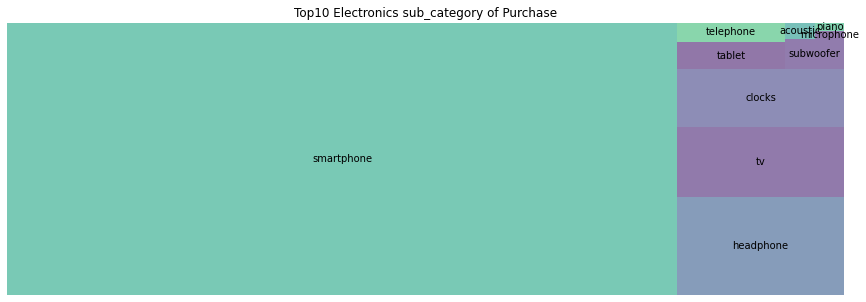

In [ ]:
top_10_elec = electronics.loc[:,'subcategory'].value_counts()[:10].sort_values(ascending=False)
plt.figure(figsize=(15,5))
squarify.plot(sizes=top_10_elec, label=top_10_elec.index.array, alpha=0.6)
plt.axis('off')
plt.title('Top10 Electronics sub_category of Purchase')
plt.show();

In [ ]:
# electronics 를 제외한 카테고리의 순위
non_electronics = purchase.loc[~(purchase['main_category'] == 'electronics')]
non_electronics['subcategory'].value_counts()

washer           16148
notebook         15590
vacuum           12378
refrigerators    11218
player            4647
                 ...  
skirt                4
shorts               2
jumper               2
jacket               1
soldering            1
Name: subcategory, Length: 106, dtype: int64

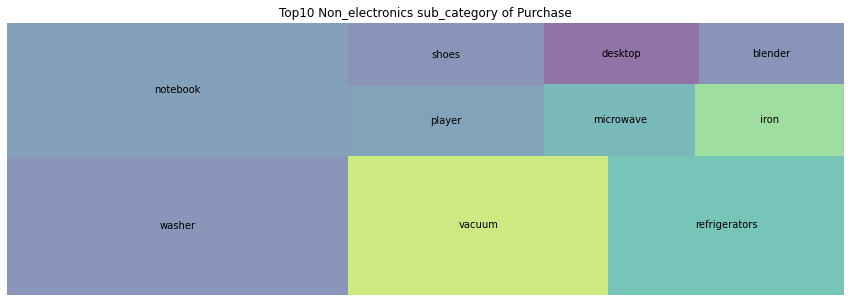

In [ ]:
top_10_nonelec = non_electronics.loc[:,'subcategory'].value_counts()[:10].sort_values(ascending=False)
plt.figure(figsize=(15,5))
squarify.plot(sizes=top_10_nonelec, label=top_10_nonelec.index.array, alpha=0.6)
plt.axis('off')
plt.title('Top10 Non_electronics sub_category of Purchase')
plt.show();

In [ ]:
# electronics, appliances 를 제외한 카테고리의 순위
non_elec_appl = purchase.loc[(~(purchase['main_category'] == 'electronics')) & (~(purchase['main_category'] == 'appliances'))]
non_elec_appl['subcategory'].value_counts()

notebook     15590
player        4647
shoes         4255
desktop       3232
drill         2790
             ...  
skirt            4
shorts           2
jumper           2
jacket           1
soldering        1
Name: subcategory, Length: 78, dtype: int64

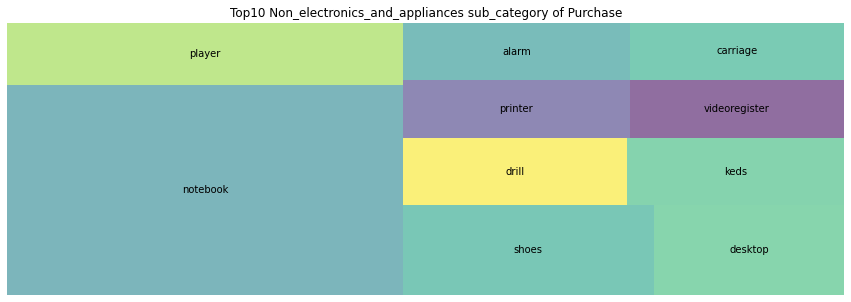

In [ ]:
top_10_non_elec_appl = non_elec_appl.loc[:,'subcategory'].value_counts()[:10].sort_values(ascending=False)
plt.figure(figsize=(15,5))
squarify.plot(sizes=top_10_non_elec_appl, label=top_10_non_elec_appl.index.array, alpha=0.6)
plt.axis('off')
plt.title('Top10 Non_electronics_and_appliances sub_category of Purchase')
plt.show();

In [ ]:
purchase['product_id'].nunique() # 상품 개수

35157

### event 비율

In [ ]:
df['event_type'].value_counts()

view        37049142
cart          918987
purchase      704461
Name: event_type, dtype: int64

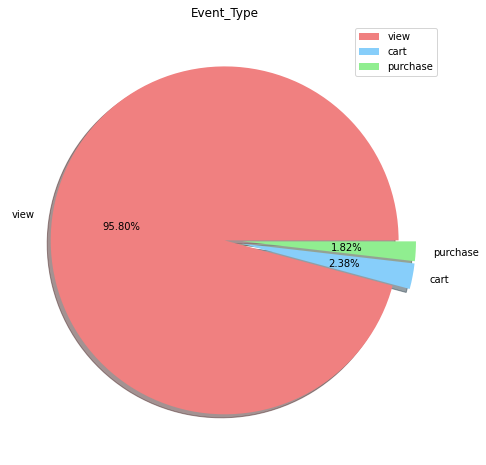

In [ ]:
labels = ['view','cart','purchase']
size = df['event_type'].value_counts()
plt.pie(size, colors = ['lightcoral', 'lightskyblue', 'lightgreen'], explode=[0,0.1,0.1], labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Event_Type')
plt.axis('off')
plt.legend()
plt.show()

### 가격별 구매량

In [48]:
purchase['price'].describe()

count    704461.000000
mean        318.798049
std         353.588806
min           0.880000
25%          90.170000
50%         185.820000
75%         385.850000
max        2574.070000
Name: price, dtype: float64

In [49]:
purchase.shape

(704461, 11)

In [ ]:
# 가격 분포를 봤을때 구매한 상품의 평균가격이 전자기기 등 높은 가격대가 많아 평균 또한 높게 나타나는 것으로 보임
high_price = purchase.loc[purchase['price'] > 318]
high_price['main_category'].value_counts()

electronics     169446
appliances       13451
computers        12751
furniture         1659
kids               727
construction       446
auto               322
sport              258
country_yard        18
apparel              2
accessories          2
Name: main_category, dtype: int64

In [ ]:
# 50% 보다 낮은 금액의 상품
low_price = purchase.loc[purchase['price'] < 185]
low_price['main_category'].value_counts()

electronics     149450
appliances       46931
auto              9439
computers         8572
apparel           7897
construction      6705
furniture         5229
kids              4459
accessories       1565
sport              598
medicine           310
stationery         134
country_yard        38
Name: main_category, dtype: int64

In [52]:
purchase.loc[purchase['price'] >= 318]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
6,2019-10-01 00:10:08,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,electronics,smartphone
9,2019-10-01 00:14:14,purchase,1004932,2053013555631882655,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562,electronics,smartphone
10,2019-10-01 02:19:10,purchase,1004246,2053013555631882655,electronics.smartphone,apple,736.18,515246296,b7dbae4f-cad3-463e-89ce-41990cf48dea,electronics,smartphone
11,2019-10-01 02:19:12,purchase,13103842,2053013553526341921,NaN,pdw,391.26,516178643,4d74b49e-3838-43cc-ac2e-a0490942b464,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
704451,2019-10-31 23:49:19,purchase,1004873,2053013555631882655,electronics.smartphone,samsung,362.29,551781196,4b3bb1cc-382f-4909-87fa-81fc9935456c,electronics,smartphone
704453,2019-10-31 23:49:30,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,544501248,8ae7872b-55c5-4e61-ab65-803091bacd7c,electronics,smartphone
704454,2019-10-31 23:49:32,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,516662286,d1b46fb7-cf95-4b40-9460-f7abde16c4d3,electronics,smartphone
704458,2019-10-31 23:56:03,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone


In [53]:
(214542 / 704461) *100 # 전체 구매자 중 평균가격보다 높은 금액대의 상품을 구매한 비율

30.45477322378386

In [54]:
purchase.loc[purchase['price'] < 318]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
2,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,NaN,NaN
3,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,toilet
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,headphone
5,2019-10-01 00:09:54,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,headphone
...,...,...,...,...,...,...,...,...,...,...,...
704452,2019-10-31 23:49:26,purchase,5100816,2053013553375346967,NaN,xiaomi,29.58,514905226,6f25d2de-bb1c-4e68-b848-f03372fb6e7d,NaN,NaN
704455,2019-10-31 23:50:16,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,551781196,4b3bb1cc-382f-4909-87fa-81fc9935456c,electronics,smartphone
704456,2019-10-31 23:53:53,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone
704457,2019-10-31 23:55:21,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,light


In [55]:
(489919 / 704461) *100

69.54522677621614

In [61]:
under_med = purchase.loc[purchase['price'] < 185]

In [57]:
(350725 / 704461) *100 # 전체 구매자 중 중앙값보다 낮은 금액대의 상품을 구매한 비율

49.78629051146905

In [62]:
# 중앙값보다 낮은 상품의 종류
under_med['main_category'].value_counts()

electronics     149450
appliances       46931
auto              9439
computers         8572
apparel           7897
construction      6705
furniture         5229
kids              4459
accessories       1565
sport              598
medicine           310
stationery         134
country_yard        38
Name: main_category, dtype: int64

In [63]:
under_med.loc[under_med['main_category'] == "electronics"]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
5,2019-10-01 00:09:54,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,headphone
8,2019-10-01 00:12:14,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,electronics,headphone
15,2019-10-01 02:20:20,purchase,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,23.13,540557704,0c990471-9407-4292-a6df-0cbc2f722a40,electronics,headphone
20,2019-10-01 02:21:59,purchase,4804501,2053013554658804075,electronics.audio.headphone,ritmix,3.37,514127317,b332ec72-5344-49e5-a3d5-27507b726259,electronics,headphone
...,...,...,...,...,...,...,...,...,...,...,...
704421,2019-10-31 23:35:11,purchase,1004863,2053013555631882655,electronics.smartphone,samsung,170.14,559242302,371c4d85-d114-4da4-9f17-d902ea47f7ca,electronics,smartphone
704423,2019-10-31 23:36:41,purchase,1004863,2053013555631882655,electronics.smartphone,samsung,170.14,559242302,371c4d85-d114-4da4-9f17-d902ea47f7ca,electronics,smartphone
704429,2019-10-31 23:40:19,purchase,4802955,2053013554658804075,electronics.audio.headphone,hyperx,107.85,519366802,52329a85-fe91-4635-842b-66d3e819b92a,electronics,headphone
704439,2019-10-31 23:44:02,purchase,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,22.80,519366802,467f84d6-fe36-48ba-a916-caa20125812f,electronics,headphone


In [64]:
under_med['subcategory'].value_counts()

smartphone    100375
headphone      26502
vacuum          9759
clocks          7458
shoes           4215
               ...  
cultivator         2
shorts             2
jumper             2
jacket             1
soldering          1
Name: subcategory, Length: 115, dtype: int64

In [59]:
elec = purchase.loc[purchase['main_category'] == "electronics"]

In [60]:
elec['price'].mean()

417.1453623873433

In [65]:
elec.loc[elec['subcategory'] == "headphone"]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,headphone
5,2019-10-01 00:09:54,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,headphone
8,2019-10-01 00:12:14,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,electronics,headphone
13,2019-10-01 02:20:11,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,517129864,df8afa49-66e0-4e54-b9ca-4be6de5c9a0f,electronics,headphone
15,2019-10-01 02:20:20,purchase,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,23.13,540557704,0c990471-9407-4292-a6df-0cbc2f722a40,electronics,headphone
...,...,...,...,...,...,...,...,...,...,...,...
704400,2019-10-31 23:21:05,purchase,4803894,2053013554658804075,electronics.audio.headphone,jbl,48.14,566092490,763b3e3f-a5c7-4f90-8f39-ada3220304ff,electronics,headphone
704419,2019-10-31 23:33:11,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,160.57,526208213,d175757c-15ef-40a8-a0aa-03d3ee90e065,electronics,headphone
704429,2019-10-31 23:40:19,purchase,4802955,2053013554658804075,electronics.audio.headphone,hyperx,107.85,519366802,52329a85-fe91-4635-842b-66d3e819b92a,electronics,headphone
704439,2019-10-31 23:44:02,purchase,4804295,2053013554658804075,electronics.audio.headphone,xiaomi,22.80,519366802,467f84d6-fe36-48ba-a916-caa20125812f,electronics,headphone


In [66]:
(30503 / 149450) * 100

20.4101706256273

In [67]:
non_headphone = elec.loc[~(elec['subcategory'] == "headphone")]

In [69]:
non_headphone['subcategory'].value_counts()

smartphone    338018
tv             21565
clocks         17906
tablet          5603
telephone       3738
subwoofer       3348
acoustic         888
microphone       430
piano            423
video            350
photo            174
projector         82
Name: subcategory, dtype: int64

### RFM 지수
- 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 지수
- segment
   - segment1 : 누적 구매횟수와 누적 구매금액이 많으면서 최근 구매이력이 있는 고객 → VVIP
   - segment2 : 누적 구매횟수는 많지만 누적 구매금액이 적고 최근 구매이력이 있는 고객 → VIP or VVIP 로 끌어 올려야하는 타겟 고객
   - segment3 : 누적 구매횟수와 구매 금액이 많지만 최근 구매이력은 없는 고객 → 변심 고객이 되돌아올 수 있도록 즉각적이고 긴급한 마케팅 대응 필요
   - segment4 : 누적 구매횟수는 적으나 최근 구매이력이 있는 고객 → 향후 VIP, VVIP로 끌어올려야 하는 타겟 고객
   - segment5 : 일정 이상 마케팅 시나리오에 반응하지 않는다면 제거 대상인 체리피커

In [10]:
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
3,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
704456,2019-10-31 23:53:53,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
704457,2019-10-31 23:55:21,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
704458,2019-10-31 23:56:03,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
704459,2019-10-31 23:56:53,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


In [11]:
merge_session = purchase.groupby(by = 'user_session').agg(Date_order = ('event_time', lambda x: x.max()),
                                                          user_id = ('user_id', lambda x: x.unique()),
                                                          Quantity = ('user_session', 'count'),
                                                          money_spent = ('price', 'sum')).reset_index(drop=True)

In [ ]:
# 날짜마다 몇개 세션인지, 얼마 지불했는지
merge_session.head()

,Date_order,user_id,Quantity,money_spent
0,2019-10-06 11:34:30,546521725,1,289.52
1,2019-10-25 08:39:11,560486342,1,171.90
2,2019-10-17 13:37:59,560744406,2,379.78
3,2019-10-15 08:09:02,520649833,1,90.07
4,2019-10-23 14:27:08,534210306,2,571.92


In [ ]:
merge_session.dtypes

Date_order      object
user_id          int64
Quantity         int64
money_spent    float64
dtype: object

In [ ]:
import datetime
merge_session['Date_order'] = pd.to_datetime(merge_session['Date_order'])

In [12]:
# 2019.11.1 기준 얼마나 최근에 구매했는지
import datetime as dt
import numpy as np
date = dt.datetime(2019,11,1)
merge_session['last_purchase'] = date - merge_session['Date_order']
merge_session['last_purchase'].astype('timedelta64[D]')
merge_session['last_purchase'] = merge_session['last_purchase'] / np.timedelta64(1, 'D')

In [13]:
merge_session.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-10-06 11:34:30,546521725,1,289.52,25.517708
1,2019-10-25 08:39:11,560486342,1,171.90,6.639456
2,2019-10-17 13:37:59,560744406,2,379.78,14.431956
3,2019-10-15 08:09:02,520649833,1,90.07,16.660394
4,2019-10-23 14:27:08,534210306,2,571.92,8.397824


In [14]:
# RFM 지수
user_pattern = merge_session.groupby('user_id').agg(Recency = ('last_purchase', lambda x: x.min()),
                                               Frequency = ('user_id', lambda x: x.count()),
                                               Monetary = ('money_spent', lambda x: x.sum()))

In [ ]:
purchase['user_id'].nunique()

333701

In [ ]:
user_pattern.sort_values(by='Monetary')

,Recency,Frequency,Monetary
user_id,,,
563893002,6.849687,1,0.88
566252844,0.130984,1,0.88
535243241,2.606574,1,0.88
534066409,6.675023,1,0.88
513085966,23.426921,1,0.88
...,...,...,...
512386086,0.587523,152,182470.80
530834332,0.778970,65,187128.93
515384420,0.324502,64,210749.77


In [ ]:
user_pattern['Recency'].describe()

count    333701.000000
mean         14.183346
std           8.673088
min           0.000509
25%           6.666169
50%          13.693900
75%          21.095602
max          30.995810
Name: Recency, dtype: float64

In [ ]:
user_pattern['Frequency'].describe()

count    333701.000000
mean          1.795820
std           2.404126
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         152.000000
Name: Frequency, dtype: float64

In [ ]:
user_pattern['Monetary'].describe()

count    333701.000000
mean        673.000058
std        2101.621661
min           0.880000
25%         111.820000
50%         249.860000
75%         613.920000
max      265569.520000
Name: Monetary, dtype: float64

In [ ]:
# 2번 이상 구매한 고객
more_twice = user_pattern.loc[user_pattern['Frequency'] >= 2]

In [ ]:
more_twice.shape

(105726, 9)

In [ ]:
(105726 / 333701) * 100 # 2번 이상 구매한 고객 비율

31.682853812245092

### segment

In [15]:
user_pattern.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,6.666169,1.0,111.82
0.50,13.693900,1.0,249.86
0.75,21.095602,2.0,613.92


In [16]:
quantile = user_pattern.quantile(q=[0.25,0.5,0.75]).to_dict()
quantile

{'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 111.82, 0.5: 249.86, 0.75: 613.92},
 'Recency': {0.25: 6.666168981481482,
  0.5: 13.693900462962963,
  0.75: 21.095601851851853}}

In [17]:
# recency - 점수 낮을수록 좋음
def Recency(x, p, d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

# frequency, monetary - 점수 낮을수록 좋음
def FM(x, p, d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [18]:
user_pattern['Recency_score'] = user_pattern['Recency'].apply(Recency, args = ('Recency', quantile,))
user_pattern['Frequency_score'] = user_pattern['Frequency'].apply(FM, args = ('Frequency', quantile,))
user_pattern['Monetary_score'] = user_pattern['Monetary'].apply(FM, args = ('Monetary', quantile,))
user_pattern['RFM_seg'] = user_pattern.Recency_score.map(str) + user_pattern.Frequency_score.map(str) + user_pattern.Monetary_score.map(str)
user_pattern['RFM_score'] = user_pattern.Recency_score.map(int) + user_pattern.Frequency_score.map(int) + user_pattern.Monetary_score.map(int)

In [19]:
user_pattern.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_seg,RFM_score
user_id,,,,,,,,
264649825,25.141539,2,1240.04,4,2,1,421,7
303160429,18.440637,1,340.59,3,4,2,342,9
340041246,17.384965,3,915.52,3,1,1,311,5
384989212,13.527789,1,41.44,2,4,4,244,10
396222093,7.253611,1,48.14,2,4,4,244,10


In [20]:
user_pattern['RFM_score'].value_counts()

9     58520
10    53288
8     44267
11    40717
7     33188
6     26142
12    22245
5     21181
4     18294
3     15859
Name: RFM_score, dtype: int64

In [21]:
# 3~12점으로 분포되어 있어 5개 구간을 2점씩 나누어 분배
def label(data):
  if data['RFM_score'] >= 11:
    return "segment5"
  elif ((data['RFM_score'] >= 9) & (data['RFM_score'] < 11)):
    return "segment4"
  elif  ((data['RFM_score'] >= 7) & (data['RFM_score'] < 9)):
    return "segment3"
  elif ((data['RFM_score'] >= 5) & (data['RFM_score'] < 7)):
    return "segment2"
  else:
    return "segment1"

In [22]:
user_pattern['RFM_label'] = user_pattern.apply(label, axis=1)

In [23]:
user_pattern

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_seg,RFM_score,RFM_label
user_id,,,,,,,,,
264649825,25.141539,2,1240.04,4,2,1,421,7,segment3
303160429,18.440637,1,340.59,3,4,2,342,9,segment4
340041246,17.384965,3,915.52,3,1,1,311,5,segment2
384989212,13.527789,1,41.44,2,4,4,244,10,segment4
396222093,7.253611,1,48.14,2,4,4,244,10,segment4
...,...,...,...,...,...,...,...,...,...
566270177,0.061609,1,75.94,1,4,4,144,9,segment4
566272569,0.024861,2,254.84,1,2,2,122,5,segment2
566274637,0.037755,1,2011.63,1,4,1,141,6,segment2


In [24]:
user_pattern.to_csv("RFM.csv")

In [71]:
RFM = user_pattern.groupby("RFM_label").agg({"Recency": "mean", "Frequency" : "mean", "Monetary" : ["mean","count"]}).round(2)

In [72]:
RFM

Recency Frequency Monetary        
             mean      mean     mean   count
RFM_label                                   
segment1     4.94      5.55  2886.06   34153
segment2    10.59      2.60  1106.17   47323
segment3    11.10      1.37   495.94   77455
segment4    15.55      1.05   263.72  111808
segment5    23.27      1.00    91.58   62962

In [80]:
RFM["Monetary"]["count"].sum()

333701

In [81]:
# segment1
(34153 / 333701)*100

10.234611223820126

In [82]:
# segment2
(47323 / 333701)*100

14.181258072346203

In [83]:
# segment3
(77455 / 333701)*100

23.210898379087865

In [84]:
# segment4
(111808 / 333701)*100

33.5054434958241

In [85]:
# segment5
(62962 / 333701)*100

18.8677888289217

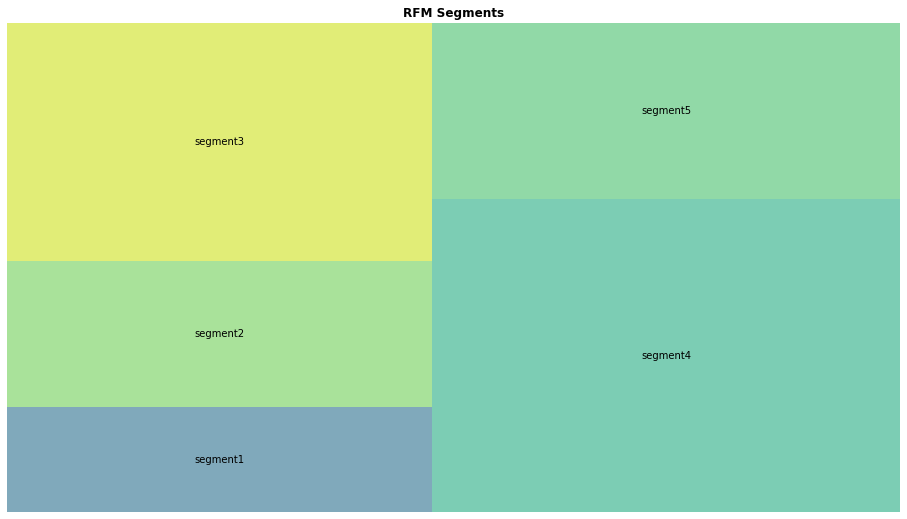

In [ ]:
# RFM.columns = RFM.columns.droplevel()
RFM.columns = ['RecencyMean', 'FrequencyMean','MonetaryMean','Count']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16,9)
squarify.plot(sizes=RFM['Count'], label=['segment1','segment2','segment3','segment4','segment5'], alpha=.6)
plt.title("RFM Segments", fontweight='bold')
plt.axis("off")
plt.show();

### segment3, segment4에 있는 고객의 주요 상품

In [25]:
seg3_4 = pd.read_csv("/content/drive/MyDrive/seg3_4.csv")

In [26]:
seg3_4

,user_id,RFM_label,brand,main_category,subcategory,price
0,264649825,segment3,kiturami,NaN,NaN,552.14
1,264649825,segment3,kiturami,NaN,NaN,687.90
2,303160429,segment4,garmin,electronics,clocks,340.59
3,384989212,segment4,artel,appliances,oven,41.44
4,396222093,segment4,cordiant,NaN,NaN,48.14
...,...,...,...,...,...,...
249022,566267483,segment4,x-game,computers,mouse,5.03
249023,566270060,segment3,hansa,appliances,microwave,59.13
249024,566270060,segment3,samsung,electronics,smartphone,88.29
249025,566270177,segment4,stels,NaN,NaN,75.94


In [27]:
seg3_4['brand'].value_counts()

samsung     61940
apple       37724
xiaomi      21613
huawei       8978
cordiant     4763
            ...  
indigo          1
weider          1
ferre           1
bot             1
afox            1
Name: brand, Length: 1662, dtype: int64

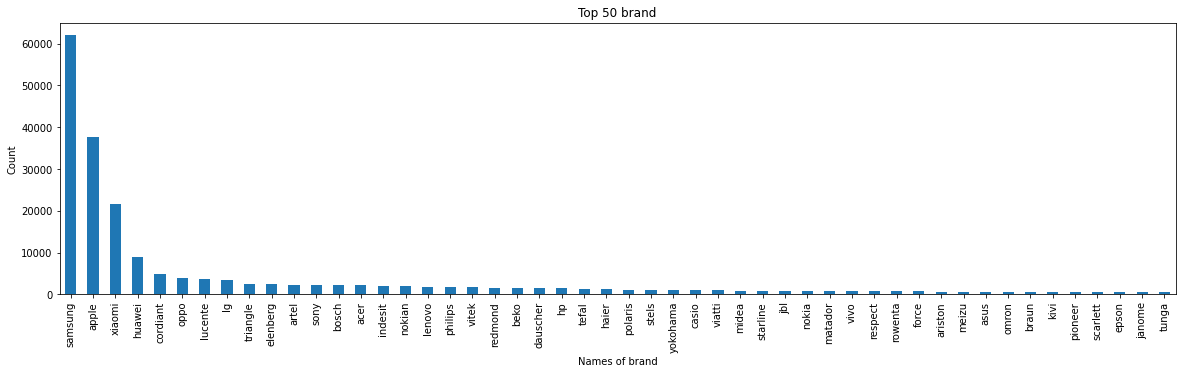

In [28]:
seg3_4['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Top 50 brand')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

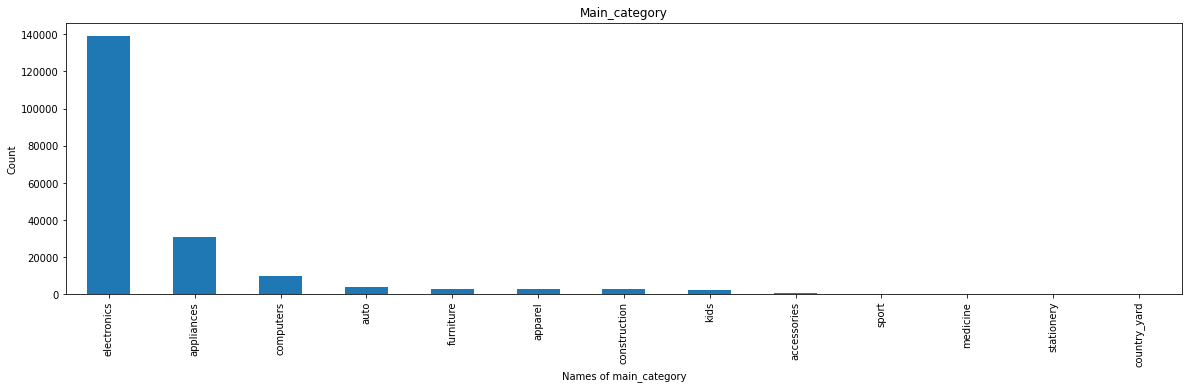

In [29]:
seg3_4['main_category'].value_counts().plot.bar(figsize=(20,5))
plt.title('Main_category')
plt.xlabel('Names of main_category')
plt.ylabel('Count')
plt.show();

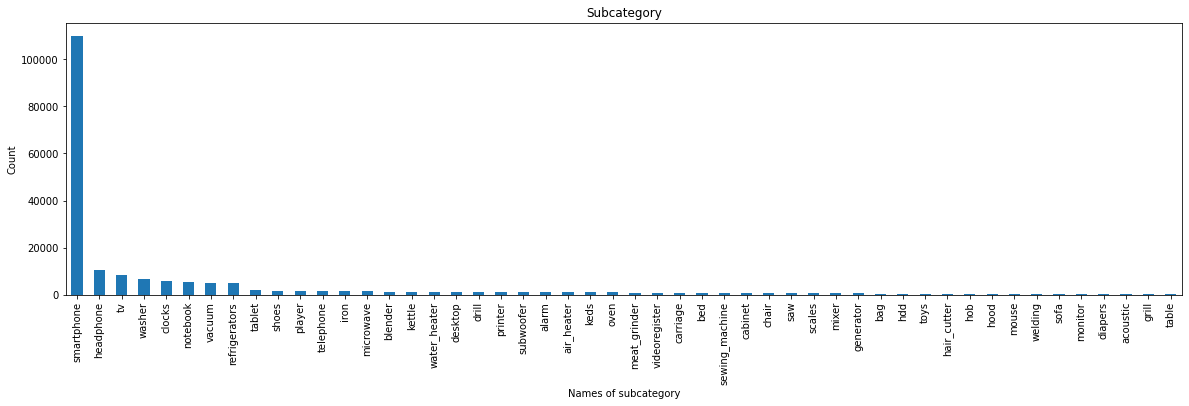

In [30]:
seg3_4['subcategory'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Subcategory')
plt.xlabel('Names of subcategory')
plt.ylabel('Count')
plt.show();

### 2번 이상 구매한 고객의 인기상품

In [ ]:
more_twice_bought = pd.read_csv("/content/drive/MyDrive/more_twice_bought.csv")

In [ ]:
more_twice_bought

,user_id,product_id,main_category,subcategory,brand,price
0,264649825,8500083,NaN,NaN,kiturami,552.14
1,264649825,8500084,NaN,NaN,kiturami,687.90
2,340041246,2100099,electronics,tv,lg,339.70
3,340041246,9300037,NaN,NaN,lg,174.78
4,340041246,9300037,NaN,NaN,lg,200.52
...,...,...,...,...,...,...
453073,566243643,4804295,electronics,headphone,xiaomi,22.80
453074,566243643,4804295,electronics,headphone,xiaomi,22.80
453075,566243643,28704135,apparel,keds,nike,159.33
453076,566272569,12704161,NaN,NaN,pirelli,131.28


In [ ]:
more_main_category = more_twice_bought['main_category'].value_counts()
more_main_category

electronics     284607
appliances       43060
computers        18502
auto              6470
apparel           5379
furniture         5214
construction      4707
kids              3426
accessories       1107
sport              730
medicine           159
stationery          72
country_yard        35
Name: main_category, dtype: int64

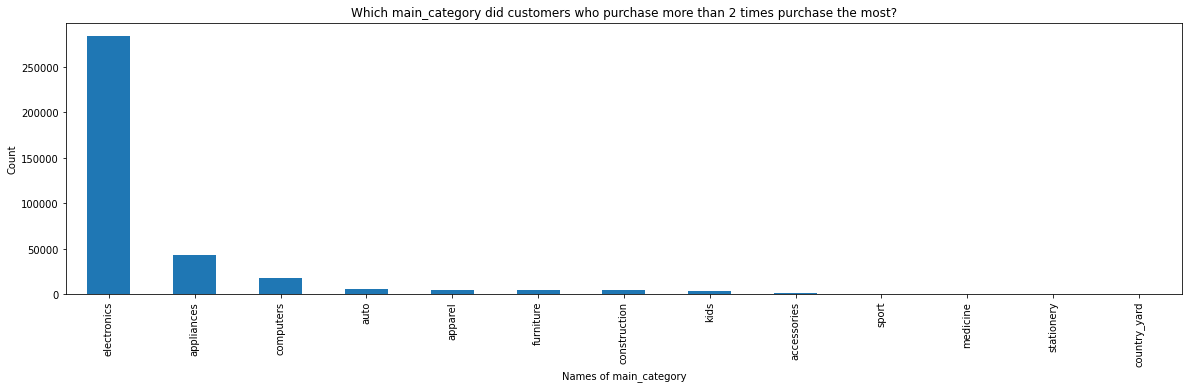

In [ ]:
more_twice_bought['main_category'].value_counts().plot.bar(figsize=(20,5))
plt.title('Which main_category did customers who purchase more than 2 times purchase the most?')
plt.xlabel('Names of main_category')
plt.ylabel('Count')
plt.show();

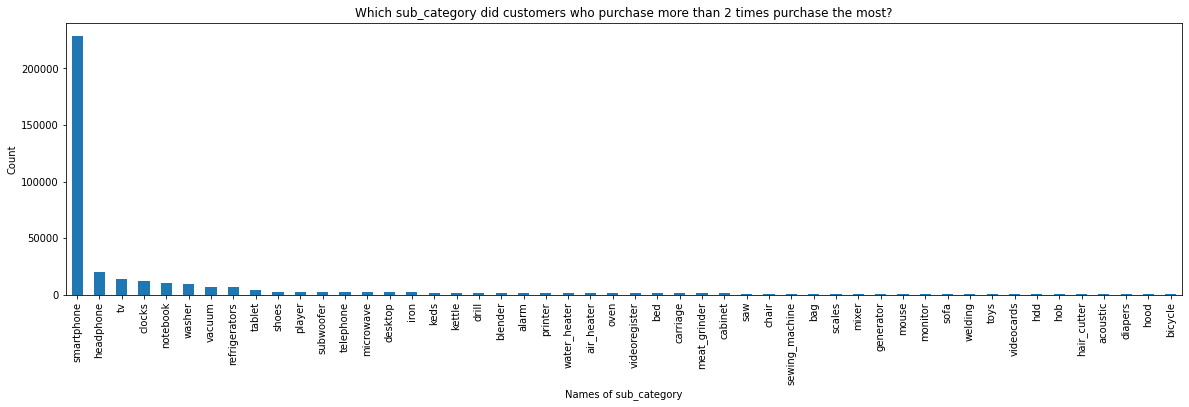

In [ ]:
more_twice_bought['subcategory'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Which sub_category did customers who purchase more than 2 times purchase the most?')
plt.xlabel('Names of sub_category')
plt.ylabel('Count')
plt.show();

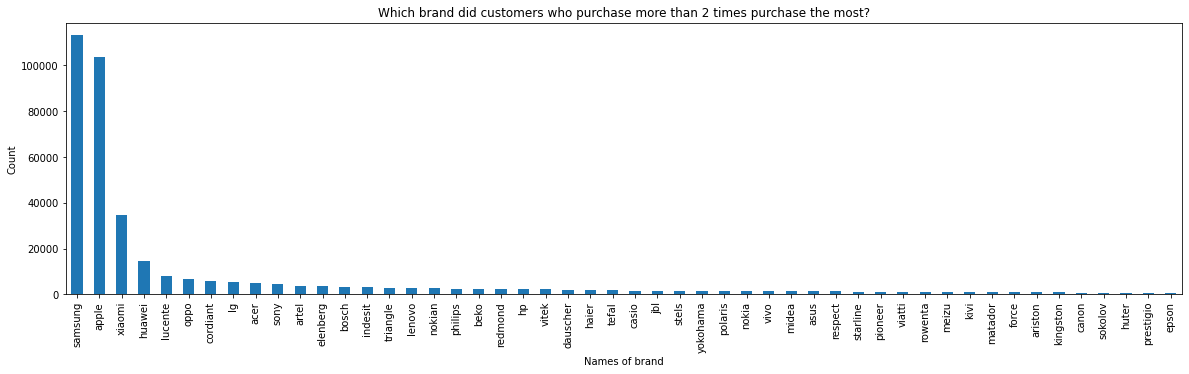

In [ ]:
more_twice_bought['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Which brand did customers who purchase more than 2 times purchase the most?')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

### 2번 이상 구매한 고객 중 $100 이하로 지출한 고객이 구매한 상품

In [ ]:
distinct_under100 = pd.read_csv("/content/drive/MyDrive/distinct_under100.csv")

In [ ]:
distinct_under100

,user_id,brand,main_category,subcategory
0,434715713,xiaomi,NaN,NaN
1,482204269,aquamarine,NaN,NaN
2,482204269,sokolov,NaN,NaN
3,501815900,NaN,auto,videoregister
4,501815900,omron,NaN,NaN
...,...,...,...,...
11714,566032106,xiaomi,NaN,NaN
11715,566122364,polaris,appliances,blender
11716,566122364,tefal,appliances,iron
11717,566194657,cordiant,NaN,NaN


In [ ]:
distinct_under100['brand'].value_counts().head(50)

xiaomi       1383
cordiant      766
elenberg      608
vitek         384
triangle      363
             ... 
anytek          1
yacco           1
gigawatt        1
ecocool         1
attribute       1
Name: brand, Length: 738, dtype: int64

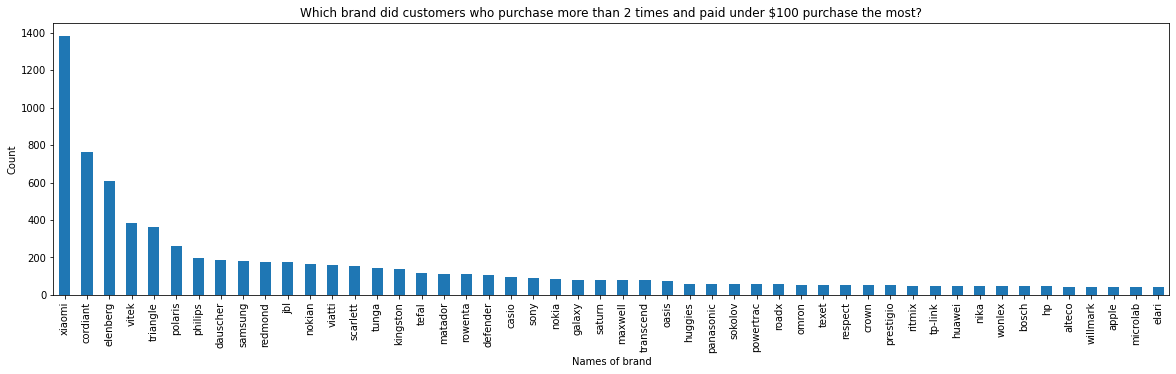

In [ ]:
under100_brand = distinct_under100['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Which brand did customers who purchase more than 2 times and paid under $100 purchase the most?')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

In [ ]:
distinct_under100['main_category'].value_counts()

appliances      2139
electronics     1686
computers        446
kids             294
construction     209
apparel          172
auto             158
furniture        142
accessories      125
medicine          26
stationery        20
sport              2
country_yard       1
Name: main_category, dtype: int64

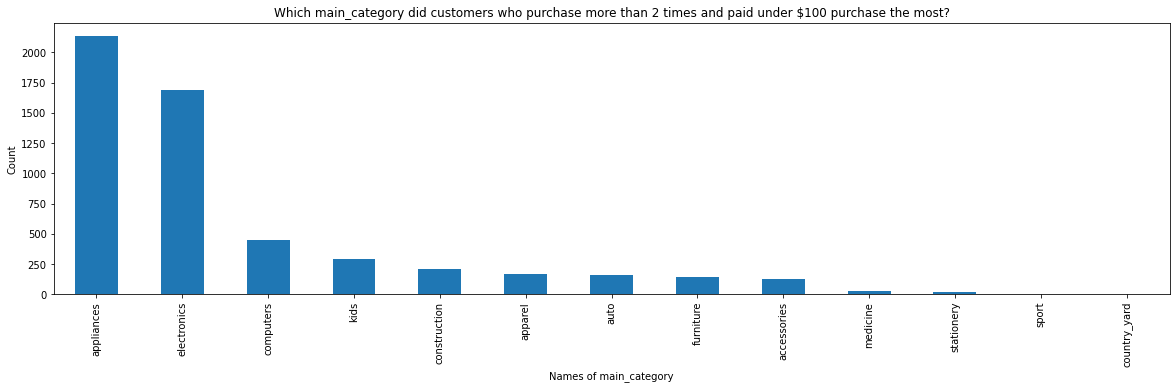

In [ ]:
under100_main = distinct_under100['main_category'].value_counts().plot.bar(figsize=(20,5))
plt.title('Which main_category did customers who purchase more than 2 times and paid under $100 purchase the most?')
plt.xlabel('Names of main_category')
plt.ylabel('Count')
plt.show();

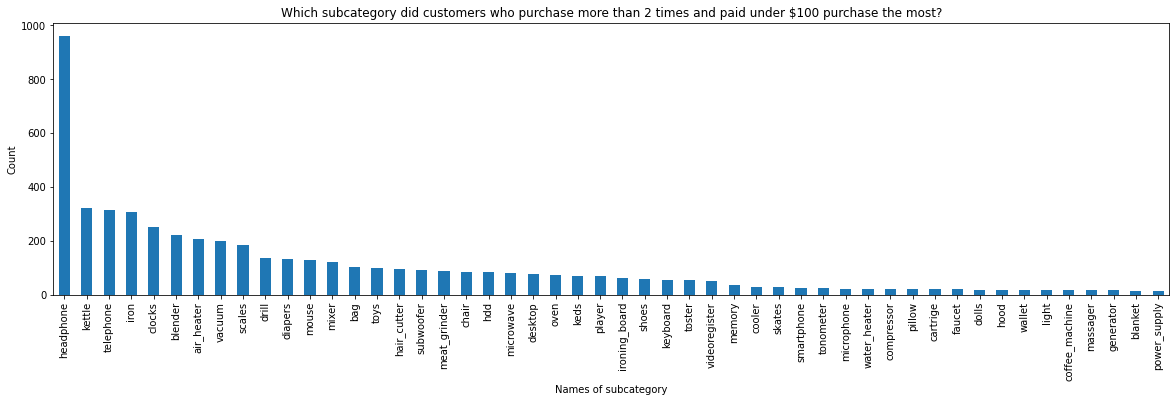

In [ ]:
under100_sub = distinct_under100['subcategory'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Which subcategory did customers who purchase more than 2 times and paid under $100 purchase the most?')
plt.xlabel('Names of subcategory')
plt.ylabel('Count')
plt.show();

### 2번 이상 구매한 고객 중 평균 금액 이하($342)로 지출한 고객이 구매한 상품

In [ ]:
less_avg_twice = pd.read_csv("/content/less_avg_twice.csv")

In [ ]:
less_avg_twice['brand'].value_counts()

samsung     89877
xiaomi      31820
apple       14012
huawei      13923
oppo         5974
            ...  
rokids          1
corpus          1
kyocera         1
wangfeng        1
forza           1
Name: brand, Length: 1655, dtype: int64

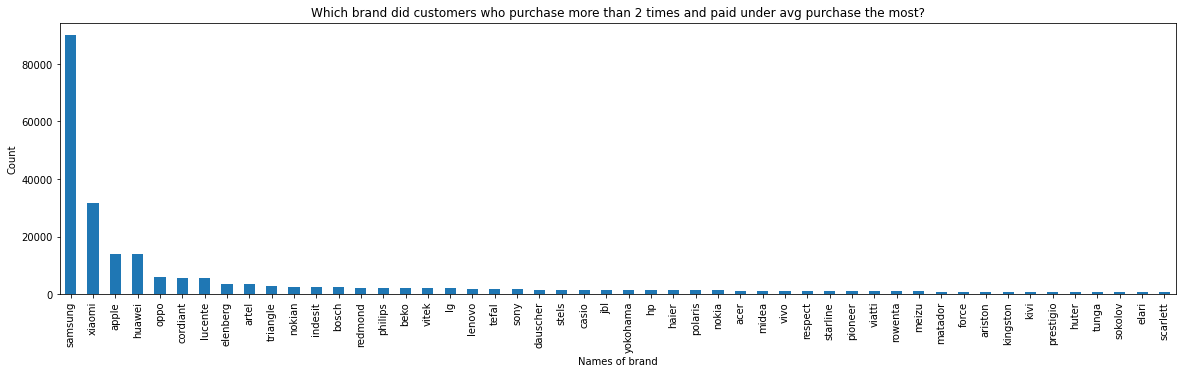

In [ ]:
less_avg_brand = less_avg_twice['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Which brand did customers who purchase more than 2 times and paid under avg purchase the most?')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

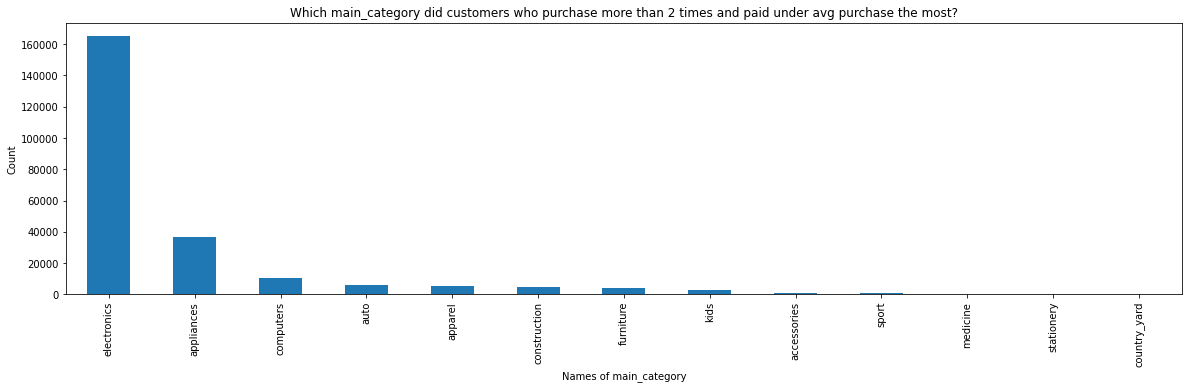

In [ ]:
less_avg_main = less_avg_twice['main_category'].value_counts().plot.bar(figsize=(20,5))
plt.title('Which main_category did customers who purchase more than 2 times and paid under avg purchase the most?')
plt.xlabel('Names of main_category')
plt.ylabel('Count')
plt.show();

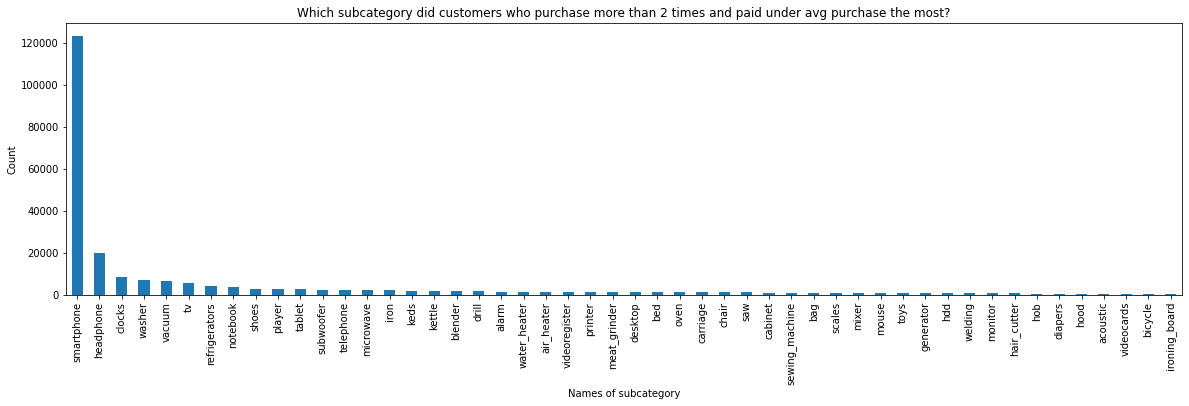

In [ ]:
less_avg_sub = less_avg_twice['subcategory'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Which subcategory did customers who purchase more than 2 times and paid under avg purchase the most?')
plt.xlabel('Names of subcategory')
plt.ylabel('Count')
plt.show();

### 구매하지 않은 고객
- view만하고 한번도 구매하지 않은 고객

In [3]:
non_purchase = pd.read_csv("/content/drive/MyDrive/non_purchase.csv")

In [6]:
non_purchase['main_category'] = non_purchase.category_code.str.split('.').str[0]
non_purchase['subcategory'] = non_purchase.category_code.str.split('.').str[-1]
non_purchase = non_purchase.reset_index(drop=True)

In [7]:
non_purchase

,event_time,product_id,category_code,brand,price,user_id,user_session,main_category,subcategory
0,2019-10-23 20:04:08 UTC,7002639,kids.carriage,bumbleride,769.65,33869381,d83dc524-8a2c-4780-bbe0-f8aee03b54df,kids,carriage
1,2019-10-04 17:44:37 UTC,6902133,furniture.living_room.chair,joie,143.89,184265397,2c5d0468-32e1-42f7-9b4e-b17c1d387247,furniture,chair
2,2019-10-04 17:45:18 UTC,6902133,furniture.living_room.chair,joie,143.89,184265397,2c5d0468-32e1-42f7-9b4e-b17c1d387247,furniture,chair
3,2019-10-04 17:50:50 UTC,6902303,furniture.living_room.chair,joie,111.46,184265397,2c5d0468-32e1-42f7-9b4e-b17c1d387247,furniture,chair
4,2019-10-04 17:51:04 UTC,6902303,furniture.living_room.chair,joie,111.46,184265397,2c5d0468-32e1-42f7-9b4e-b17c1d387247,furniture,chair
...,...,...,...,...,...,...,...,...,...
25768427,2019-10-31 23:58:19 UTC,1005127,electronics.smartphone,apple,1671.66,566280663,d5fd7b2d-07ef-43d9-b8c9-3d11fbffbde0,electronics,smartphone
25768428,2019-10-31 23:58:42 UTC,1005127,electronics.smartphone,apple,1671.66,566280663,d5fd7b2d-07ef-43d9-b8c9-3d11fbffbde0,electronics,smartphone
25768429,2019-10-31 23:58:39 UTC,13201002,furniture.bedroom.bed,stendmebel,176.04,566280676,c7bc5bdb-2660-4272-8c10-2b5ce9e0be20,furniture,bed
25768430,2019-10-31 23:58:56 UTC,2300307,electronics.camera.video,dji,434.50,566280697,ba2dabd3-0086-4a37-83ed-fc1e547106f5,electronics,video


In [8]:
(704461 / 42448764) * 100 # 전체 event 중 purchase 비율

1.6595559767064123

In [9]:
(25768432 / 42448764) * 100 # 전체 event 중 only view 비율

60.70478754104596

In [10]:
non_purchase['brand'].value_counts()

samsung            3296231
apple              2583942
xiaomi             2030658
huawei              734275
lucente             455874
                    ...   
mei-cha                  1
narodnyerecepty          1
lifegear                 1
interlink                1
grand                    1
Name: brand, Length: 3415, dtype: int64

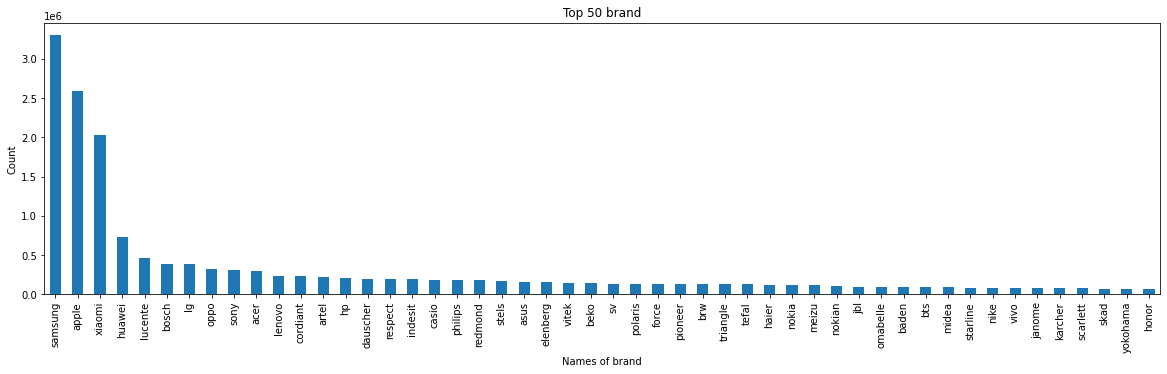

In [11]:
non_purchase['brand'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('Top 50 brand')
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show();

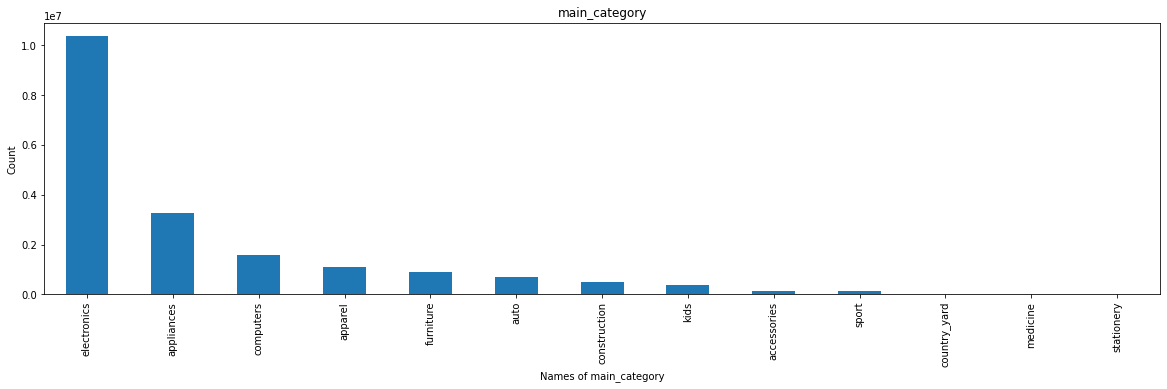

In [12]:
non_purchase['main_category'].value_counts().plot.bar(figsize=(20,5))
plt.title('main_category')
plt.xlabel('Names of main_category')
plt.ylabel('Count')
plt.show();

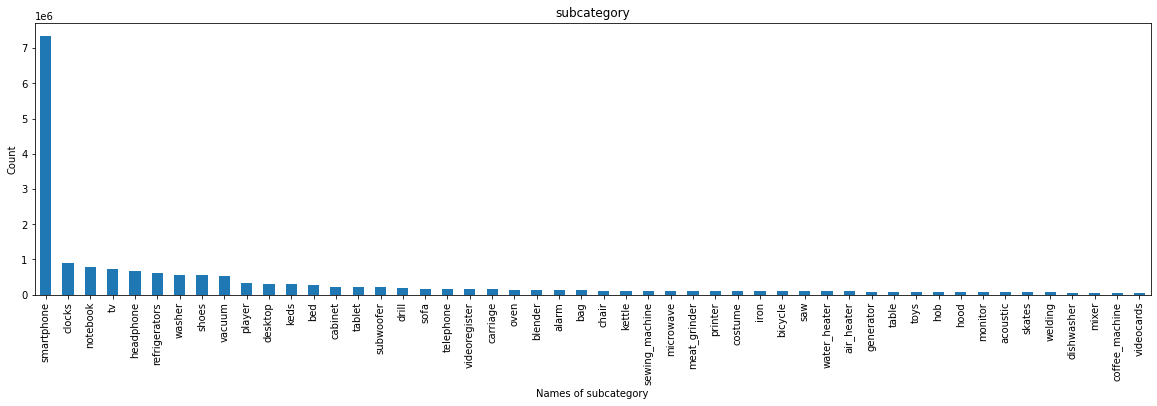

In [14]:
non_purchase['subcategory'].value_counts().head(50).plot.bar(figsize=(20,5))
plt.title('subcategory')
plt.xlabel('Names of subcategory')
plt.ylabel('Count')
plt.show();

### 매출액

In [34]:
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,subcategory
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
2,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,NaN,NaN
3,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,toilet
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,headphone
...,...,...,...,...,...,...,...,...,...,...,...
704456,2019-10-31 23:53:53,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone
704457,2019-10-31 23:55:21,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,light
704458,2019-10-31 23:56:03,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone
704459,2019-10-31 23:56:53,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,electronics,smartphone


In [35]:
purchase['price'].sum()

224580792.34

In [38]:
elec = purchase.loc[purchase['main_category'] == "electronics"]

In [40]:
elec['price'].sum()

176464168.35999998

In [41]:
(176464168.35999998 / 224580792.34) * 100 # 전체 매출에서 전자제품이 차지하는 비중

78.57491574472908

In [44]:
appli = purchase.loc[purchase['main_category'] == "appliances"]

In [45]:
appli['price'].sum()

13583121.92

In [46]:
(13583121.92 / 224580792.34) * 100 # 전체 매출에서 가전제품이 차지하는 비중

6.048211772018366